In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Read the CSV file with the appropriate encoding
data = pd.read_csv('final_data_30k_latest.csv', encoding='latin-1')

# Extract the input parameters and the target variable
X = data[['pH', 'Dissolved Oxygen (mg/L)', 'Water Temperature (Â°C)', 
          'Suspended solids (mg/L)', 'Conductivity (Î¼S/cm)']]
y = data['Nitrite-Nitrogen (mg/L)']


In [12]:
scaler = MinMaxScaler()
normalized_input_params = scaler.fit_transform(X)

In [13]:
normalized_input = pd.DataFrame(normalized_input_params, columns=X.columns)

In [14]:
normalized_input

,pH,Dissolved Oxygen (mg/L),Water Temperature (Â°C),Suspended solids (mg/L),Conductivity (Î¼S/cm)
0,0.569892,0.408654,0.392857,0.000513,0.259398
1,0.591398,0.490385,0.172078,0.001488,0.127422
2,0.591398,0.418269,0.503247,0.000138,0.032632
3,0.569892,0.384615,0.512987,0.000275,0.229944
4,0.591398,0.384615,0.561688,0.000650,0.182868
...,...,...,...,...,...
30211,0.462366,0.120192,0.694805,0.007113,0.004636
30212,0.440860,0.033654,0.798701,0.007738,0.006053
30213,0.440860,0.014423,0.649351,0.000613,0.012328
30214,0.430108,0.033654,0.568182,0.011113,0.041479


In [15]:
import numpy as np
from scipy import stats

# Define a z-score threshold for outlier detection
zscore_threshold = 3

# Compute the z-scores for input parameters
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores) 

# Remove outliers from input parameters
input_params_cleaned = X[(abs_z_scores < zscore_threshold).all(axis=1)]
target_variable_cleaned = y[(abs_z_scores < zscore_threshold).all(axis=1)]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(input_params_cleaned, target_variable_cleaned, test_size=0.2, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
grnn = KNeighborsRegressor(weights='distance')
grnn.fit(X_train, y_train)

# Make predictions
y_pred = grnn.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.7164155199999814
Root Mean Squared Error: 0.8464133269272061
Mean Absolute Error: 0.16902038230306135
R2 Score: -0.1869233057149433


C:\Users\DELL\AppData\Local\Temp\ipykernel_25280\4190700997.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  subset_target_variable = y_test[start_index:end_index]


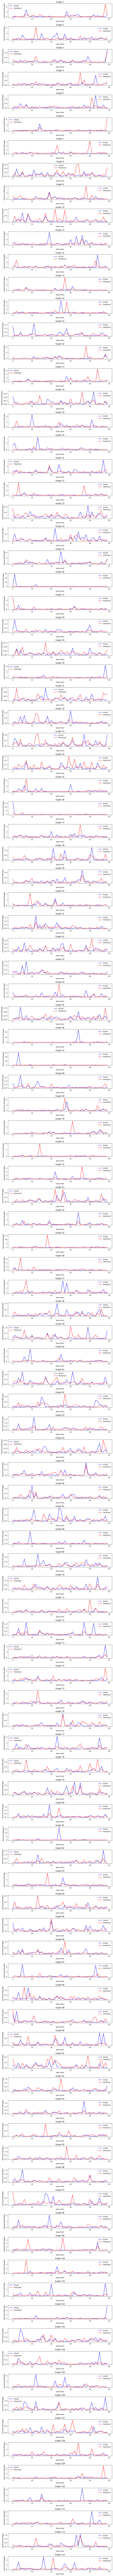

In [19]:
import matplotlib.pyplot as plt

# Define the number of data points per graph
data_points_per_graph = 50

# Calculate the total number of graphs
num_graphs = len(y_test) // data_points_per_graph

# Create subplots
fig, axes = plt.subplots(num_graphs, 1, figsize=(10, num_graphs*2))

# Iterate through the graphs
for i, ax in enumerate(axes):
    # Calculate the start and end indices for the current graph
    start_index = i * data_points_per_graph
    end_index = start_index + data_points_per_graph

    # Extract the subset of input parameters and target variable for the current graph
    # subset_input_params = input_params[start_index:end_index]
    subset_target_variable = y_test[start_index:end_index]

    # Plot actual vs predicted values
    ax.plot(subset_target_variable.values, 'b-', label='Actual')
    ax.plot(y_pred[start_index:end_index], 'r-', label='Predicted')

    # Set title and labels
    ax.set_title(f'Graph {i+1}')
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Ammonia-Nitrogen')
    ax.legend()

# Adjust subplot spacing
plt.tight_layout()

# Display the plots
plt.show()
